In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [ ]:
import os

directory = './dataset'

batch_size = 32
image_size = (224,224)

for file in os.listdir(directory):
    if os.path.isdir(os.path.join(directory, file)):
        print(file)

Cutting Weevil
Bacterial Canker
Healthy
Sooty Mould
Gall Midge
Die Back
Anthracnose
Powdery Mildew


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

# Load the training data
train_dataset = train_datagen.flow_from_directory(
    directory='./dataset',
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    shuffle=True,
)

# Load the validation data
validation_dataset = train_datagen.flow_from_directory(
    directory='./dataset',
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    shuffle=True,
) 

Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(8, activation='sigmoid')
])


# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
100/100 [==============================] - 448s 4s/step - loss: 1.5193 - accuracy: 0.4350 - val_loss: 1.3554 - val_accuracy: 0.5437
Epoch 2/10
100/100 [==============================] - 430s 4s/step - loss: 0.6204 - accuracy: 0.7619 - val_loss: 0.6419 - val_accuracy: 0.7513
Epoch 3/10
100/100 [==============================] - 411s 4s/step - loss: 0.4172 - accuracy: 0.8450 - val_loss: 0.6602 - val_accuracy: 0.7638
Epoch 4/10
100/100 [==============================] - 430s 4s/step - loss: 0.3256 - accuracy: 0.8869 - val_loss: 0.5151 - val_accuracy: 0.8225
Epoch 5/10
100/100 [==============================] - 420s 4s/step - loss: 0.2257 - accuracy: 0.9191 - val_loss: 0.4919 - val_accuracy: 0.8125
Epoch 6/10
100/100 [==============================] - 420s 4s/step - loss: 0.1992 - accuracy: 0.9331 - val_loss: 0.6504 - val_accuracy: 0.8075
Epoch 7/10
100/100 [==============================] - 418s 4s/step - loss: 0.1945 - accuracy: 0.9266 - val_loss: 0.4494 - val_accuracy: 0.8313

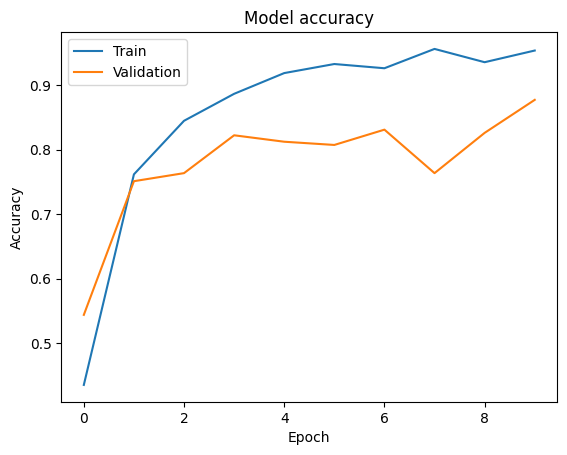

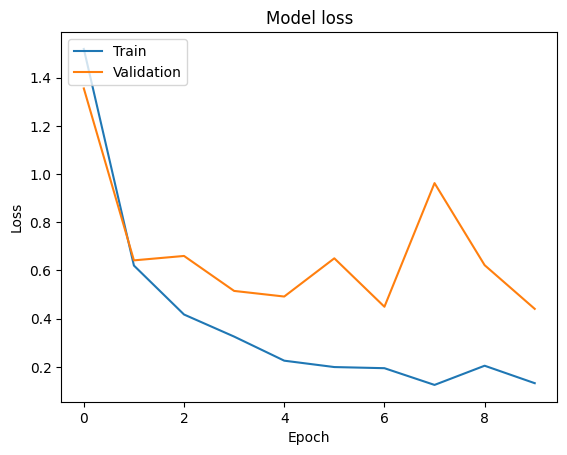

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save_weights('model1.h5')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='sigmoid')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=validation_dataset)

Epoch 1/10
100/100 [==============================] - 558s 6s/step - loss: 1.9282 - accuracy: 0.3331 - val_loss: 1.4291 - val_accuracy: 0.3762
Epoch 2/10
100/100 [==============================] - 546s 5s/step - loss: 1.1689 - accuracy: 0.5625 - val_loss: 1.1610 - val_accuracy: 0.5038
Epoch 3/10
100/100 [==============================] - 546s 5s/step - loss: 0.8309 - accuracy: 0.6941 - val_loss: 0.9554 - val_accuracy: 0.6300
Epoch 4/10
100/100 [==============================] - 546s 5s/step - loss: 0.6533 - accuracy: 0.7641 - val_loss: 0.8310 - val_accuracy: 0.6762
Epoch 5/10
100/100 [==============================] - 546s 5s/step - loss: 0.5231 - accuracy: 0.8041 - val_loss: 0.9326 - val_accuracy: 0.6888
Epoch 6/10
100/100 [==============================] - 550s 5s/step - loss: 0.4285 - accuracy: 0.8481 - val_loss: 0.9903 - val_accuracy: 0.5838
Epoch 7/10
100/100 [==============================] - 548s 5s/step - loss: 0.4473 - accuracy: 0.8306 - val_loss: 0.7558 - val_accuracy: 0.7700

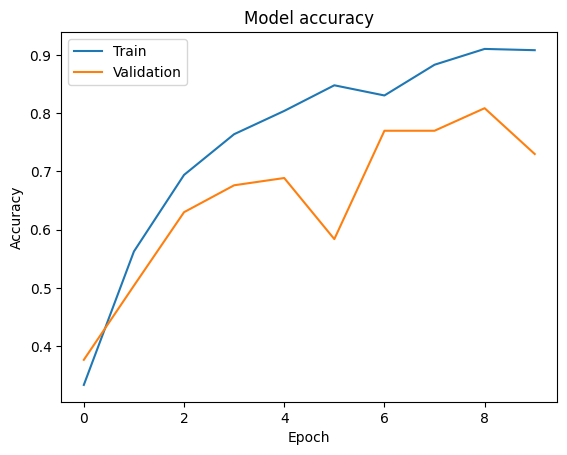

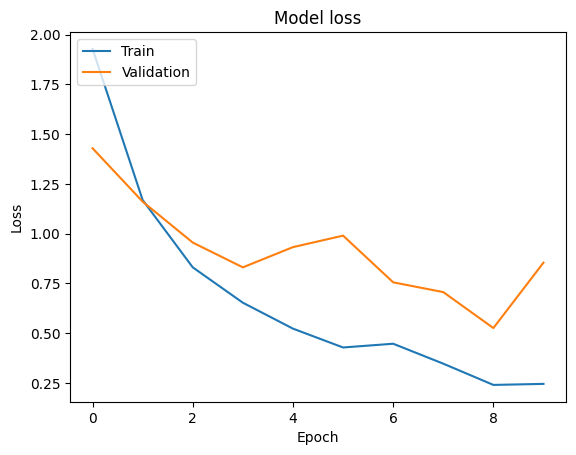

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
model.save_weights('model2.h5')

In [ ]:
#We need to pic the model 1 as the accuracy of the model is high compared to the model2